<a href="https://colab.research.google.com/github/fisheadfocker/discord-bot/blob/main/4.0_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Created on Sun Nov 10 23:02:46 2024

@author: Dr. Chuen-Sheng Cheng,
Dept. of Industrial Engineering and Management
Yuan Ze University
"""

'\nCreated on Sun Nov 10 23:02:46 2024\n\n@author: Dr. Chuen-Sheng Cheng, \nDept. of Industrial Engineering and Management\nYuan Ze University\n'

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

In [ ]:
#Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/IE-304/IE-304/refs/heads/main/4.1_Covid%2019.csv")

In [ ]:
#Setting the value for X and Y
X = df[['Index']]
y = df['Infected']

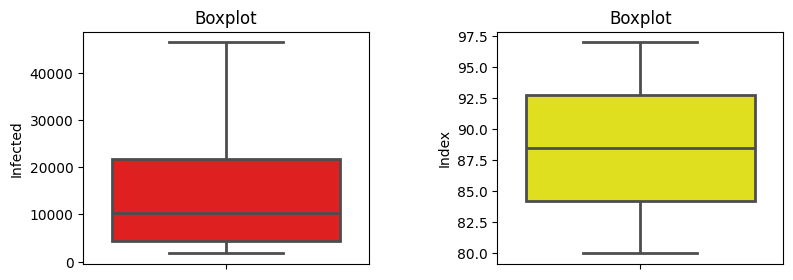

In [ ]:
#Box plot
plt.figure(figsize=(8,6))
plt.subplots_adjust(top=1, right=1, hspace=0.3, wspace=0.45)
plt.subplot(2,2,1)
sns.boxplot(data=df, y="Infected", orient='v', color='red',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,2,2)
sns.boxplot(data=df, y="Index", orient='v', color='yellow',linewidth=2, width=0.8).set(title='Boxplot')
plt.show()

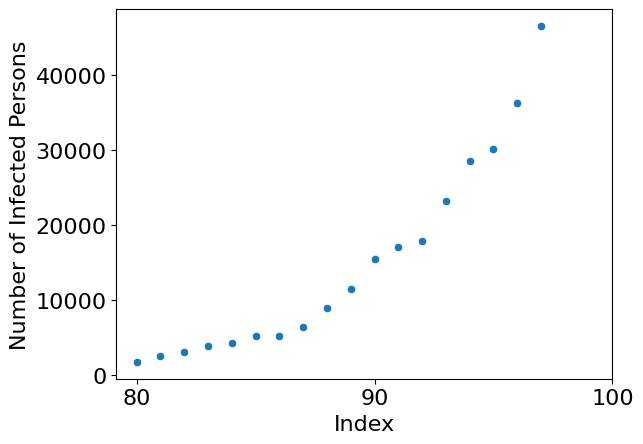

In [ ]:
# Scatter plot
sns.scatterplot(data=df, y="Infected",x="Index")
plt.xticks([80, 90, 100], fontsize=16)
plt.xlabel('Index', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of Infected Persons', fontsize=16)
plt.show()

In [ ]:
# Print correlation coefficients
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
          Infected     Index
Infected  1.000000  0.933789
Index     0.933789  1.000000


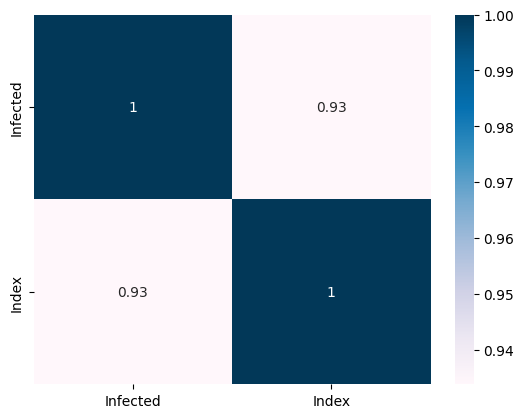

In [ ]:
# Plotting correlation matrix
sns.heatmap(matrix, cmap="PuBu", annot=True) #Blues, Greens
# Display the plot
plt.show()

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y~I(X)+I(X**2)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     562.1
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           7.87e-15
Time:                        05:15:06   Log-Likelihood:                -156.85
No. Observations:                  18   AIC:                             319.7
Df Residuals:                      15   BIC:                             322.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.227e+06   1.24e+05      9.896      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Prediction of test set
y_pred= model.predict(X)
y=np.log10(y)
#Predicted values
print("Prediction for test set:\n{}".format(y_pred))
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y, 'Predicted value': y_pred})
mlr_diff.head()

Prediction for test set:
0      3445.403509
1      2850.910217
2      2619.510320
3      2751.203818
4      3245.990712
5      4103.871001
6      5324.844685
7      6908.911765
8      8856.072239
9     11166.326109
10    13839.673375
11    16876.114035
12    20275.648091
13    24038.275542
14    28163.996388
15    32652.810630
16    37504.718266
17    42719.719298
dtype: float64


,Actual value,Predicted value
0,3.237292,3445.403509
1,3.394627,2850.910217
2,3.485437,2619.510320
3,3.586475,2751.203818
4,3.623663,3245.990712


In [ ]:
#Model Evaluation
R2score = r2_score(y, y_pred)
R2score2 = explained_variance_score(y, y_pred, force_finite=False)
meanAbErr = mean_absolute_error(y, y_pred)
meanSqErr = mean_squared_error(y, y_pred)
rootMeanSqErr = np.sqrt(mean_squared_error(y, y_pred))
print('R squared: %.3f' %R2score)
print('R squared2: %.3f' %R2score2)
print('Mean Absolute Error: %.4f' %meanAbErr)
print('Mean Square Error: %.4f' %meanSqErr)
print('Root Mean Square Error: %.4f' %rootMeanSqErr)

R squared: -2148338799.101
R squared2: -911807228.850
Mean Absolute Error: 14848.4572
Mean Square Error: 383054200.2230
Root Mean Square Error: 19571.7705


In [ ]:
sample_no=len(y_pred)
LW=2; FS=16

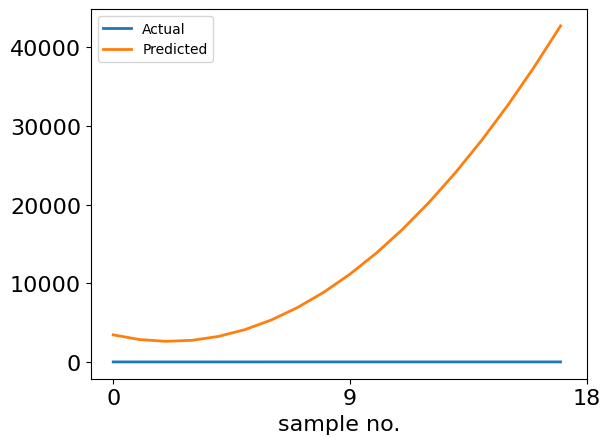

In [ ]:
plt.plot(y, label='Actual', linewidth=LW)
plt.plot(y_pred, label='Predicted', linewidth=LW)
plt.xticks([0, sample_no/2, sample_no], fontsize=FS)
plt.xlabel('sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.legend(loc='best')
plt.show()

Residual:-14848.457


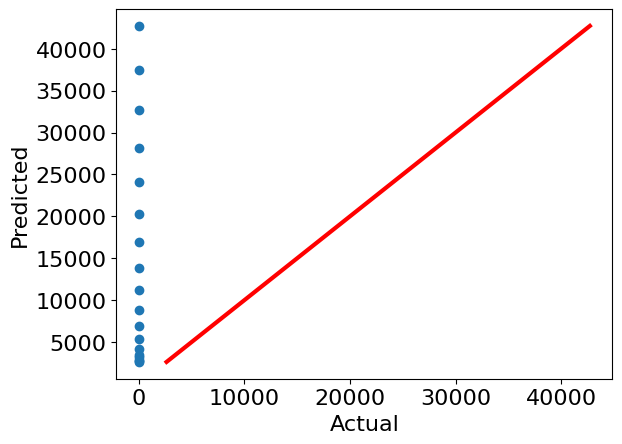

In [ ]:
residual=y-y_pred
print('Residual:%.3f' %residual.mean())
linestart=y_pred.min()
lineend=y_pred.max()
plt.scatter(y, y_pred)
plt.plot([linestart, lineend], [linestart, lineend], color='r', lw=3)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Actual', fontsize=FS)
plt.ylabel('Predicted', fontsize=FS)
plt.show()

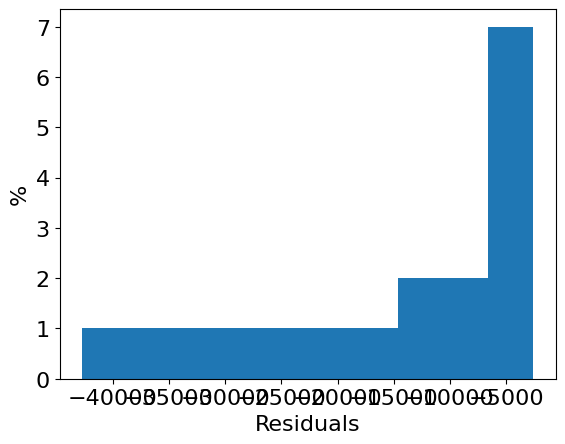

In [ ]:
plt.hist(residual)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Residuals', fontsize=FS)
plt.ylabel('%', fontsize=FS)
plt.show()


Anderson Darling test statistic:0.9394
P-Value:0.0134


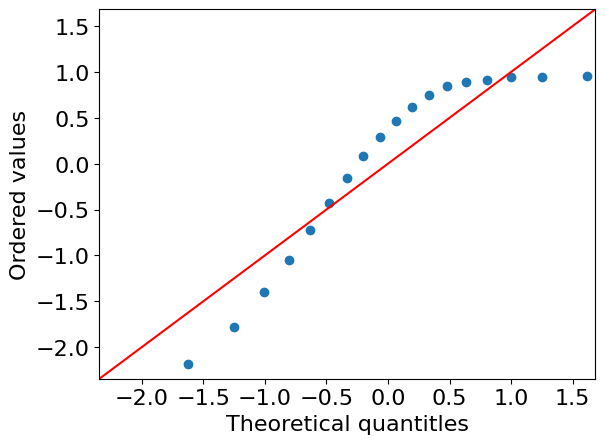

In [ ]:
# Normality test of residuals using Ander-Darling test
import statsmodels.api as sm
[AD2, pvalue]=sm.stats.diagnostic.normal_ad(residual)
print('\nAnderson Darling test statistic:%.4f' % AD2)
print ('P-Value:%.4f' % pvalue)
rawdata=np.array(residual, dtype=float)
sm.qqplot(rawdata, fit=True, line ='45')
plt.xlabel("Theoretical quantitles", fontsize=FS)
plt.ylabel("Ordered values", fontsize=FS)
plt.xticks(fontsize=FS); plt.yticks(fontsize=FS)
plt.show()